In [2]:
import scipy.stats as sts
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special as sp

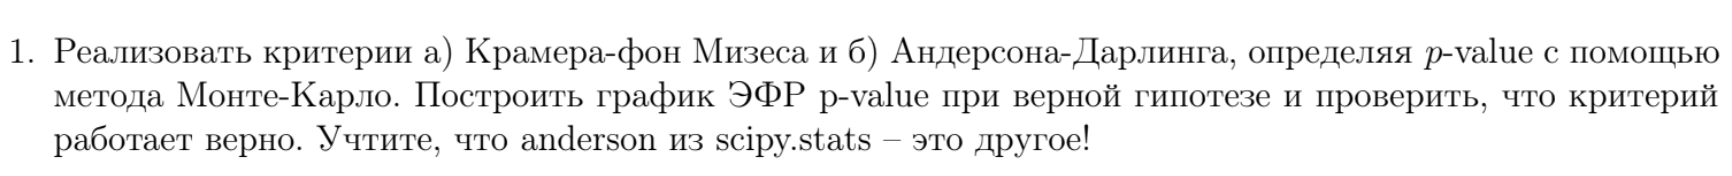

In [3]:
def cvm_stat(data: np.array, distr):
    n = len(data)
    data = np.sort(data)
    res = sum([((2*(i+1) - 1)/(2*n) - distr(data[i]))**2 for i in range(n)]) + 1/(12*n)
    return res
def monte_carlo_test(data, statistic:float): # Monte-Carlo implementation
    compare = data > statistic
    size = len(data)
    pvalue = np.divide(np.sum(compare), size)
    return pvalue

In [3]:
# file = open('cvmstat.txt', 'w')
# for j in range(10000):
#     data = sts.uniform.rvs(size=100)
#     print(cvm_stat(data, sts.uniform.cdf), file = file)
# file.close()

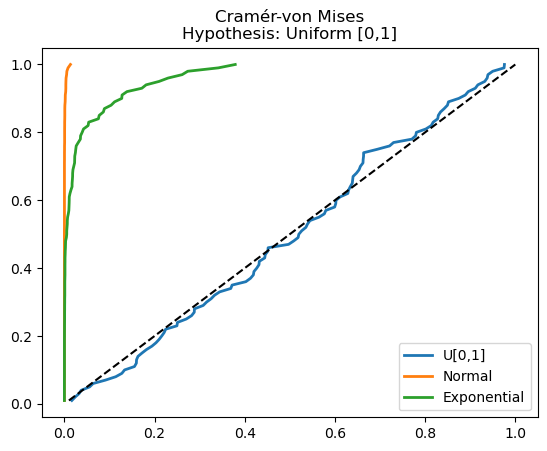

In [4]:
# Cramér-von Mises implementation
hypothesis_cvm = sts.uniform # null-hypothesis

n = 30 # size of a given samples

file = open('cvmstat.txt', 'r')
data_cvm = file.read().splitlines()
file.close()
data_cvm = [eval(x) for x in data_cvm]

fig, ax = plt.subplots()
plt.title("Cramér-von Mises\nHypothesis: Uniform [0,1]")

result_uni = []
result_norm = []
result_exp = []

division_rate = 100
for j in range (division_rate):
    test_uni = sts.uniform.rvs(size = n)
    test_stat_uni = cvm_stat(test_uni, hypothesis_cvm.cdf)
    test_res_uni = monte_carlo_test(data_cvm, test_stat_uni)
    result_uni.append(test_res_uni)
    
    test_norm = sts.norm.rvs(size = n)
    test_stat_norm = cvm_stat(test_norm, hypothesis_cvm.cdf)
    test_res_norm = monte_carlo_test(data_cvm, test_stat_norm)
    result_norm.append(test_res_norm)
    
    test_exp = sts.expon.rvs(size = n)
    test_stat_exp = cvm_stat(test_exp, hypothesis_cvm.cdf)
    test_res_exp = monte_carlo_test(data_cvm, test_stat_exp)
    result_exp.append(test_res_exp)
    
result_uni = np.sort(result_uni)
result_norm = np.sort(result_norm)
result_exp = np.sort(result_exp)

y_vals = [(i+1)/division_rate for i in range(division_rate)]
ax.plot(result_uni,y_vals, lw = 2, label = "U[0,1]")
ax.plot(result_norm,y_vals, lw = 2, label = "Normal")
ax.plot(result_exp,y_vals, lw = 2, label = "Exponential")

ax.plot(y_vals,y_vals, linestyle = 'dashed', c = 'black')
ax.legend()

In [5]:
def ad_stat(data: np.array, distr):
    data = np.sort(data)
    n = len(data)
    res = -n - sum([((2*(i+1)-1)/n) * (np.log(0.00001 + distr(data[i])) + np.log(0.00001 + 1-distr(data[n-(i+1)]))) for i in range(n)])
    return res

In [6]:
# file = open('adstat.txt', 'w')
# for j in range(10000):
#     data = sts.uniform.rvs(size=100)
#     print(ad_stat(data, sts.uniform.cdf), file = file)
# file.close()

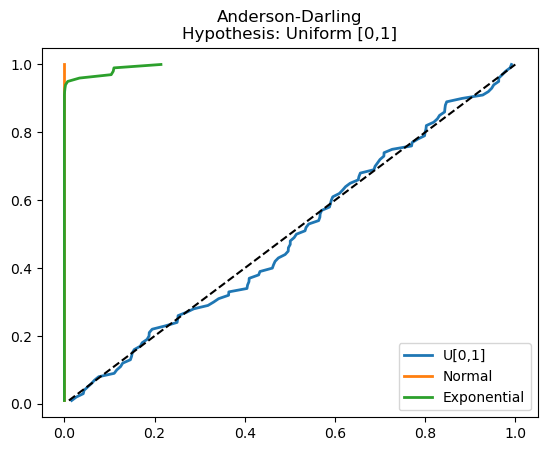

In [10]:
# Anderson-Darling implementation
hypothesis_ad = sts.uniform # null-hypothesis

n = 5 # size of a given samples

file = open('adstat.txt', 'r')
data_ad = file.read().splitlines()
file.close()
data_ad = [eval(x) for x in data_ad]

fig, ax = plt.subplots()
plt.title("Anderson-Darling\nHypothesis: Uniform [0,1]")

result_uni = []
result_norm = []
result_exp = []

division_rate = 100
for j in range (division_rate):
    test_uni = sts.uniform.rvs(size = n)
    test_stat_uni = ad_stat(test_uni, hypothesis_ad.cdf)
    test_res_uni = monte_carlo_test(data_ad, test_stat_uni)
    result_uni.append(test_res_uni)
    
    test_norm = sts.norm.rvs(size = n)
    test_stat_norm = ad_stat(test_norm, hypothesis_ad.cdf)
    test_res_norm = monte_carlo_test(data_cvm, test_stat_norm)
    result_norm.append(test_res_norm)
    
    test_exp = sts.expon.rvs(size = n)
    test_stat_exp = ad_stat(test_exp, hypothesis_ad.cdf)
    test_res_exp = monte_carlo_test(data_cvm, test_stat_exp)
    result_exp.append(test_res_exp)
    
result_uni = np.sort(result_uni)
result_norm = np.sort(result_norm)
result_exp = np.sort(result_exp)

y_vals = [(i+1)/division_rate for i in range(division_rate)]
ax.plot(result_uni,y_vals, lw = 2, label = "U[0,1]")
ax.plot(result_norm,y_vals, lw = 2, label = "Normal")
ax.plot(result_exp,y_vals, lw = 2, label = "Exponential")

ax.plot(y_vals,y_vals, linestyle = 'dashed', c = 'black')
ax.legend()

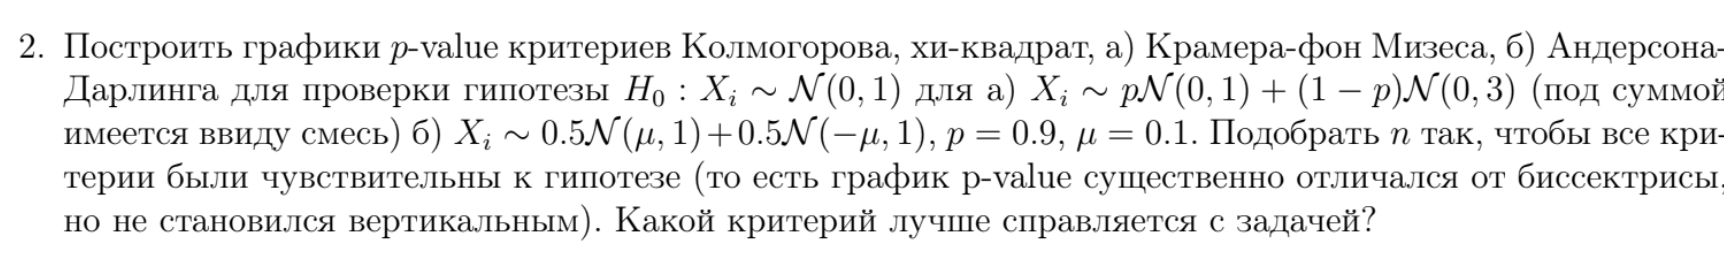

In [8]:
file = open('adstat.txt', 'r')
data_ad = file.read().splitlines()
file.close()
data_ad = [eval(x) for x in data_ad]

In [37]:
file = open('cvmstat.txt', 'r')
data_cvm = file.read().splitlines()
file.close()
data_cvm = [eval(x) for x in data_cvm]

In [11]:
def generate_sample_1(p, n:int):
    sample = []
    for i in range(n):
        test = sts.bernoulli(p).rvs()
        if test==1:
            variable = sts.norm(loc=0,scale=1).rvs()
            sample.append(variable)
        else:
            variable = sts.norm(loc=0,scale=np.sqrt(3)).rvs()
            sample.append(variable)
    return sample
def generate_sample_2(mu, n:int): 
    sample = []
    for i in range(n):
        test = sts.bernoulli(1/2).rvs()
        if test==1:
            variable = sts.norm(loc= mu,scale=1).rvs()
            sample.append(variable)
        else:
            variable = sts.norm(loc= -mu,scale=1).rvs()
            sample.append(variable)
    return sample
def get_f_obs(data, percentiles):
    f_obs = []
    size = len(percentiles)
    for j in range(size):
        if j == 0:
            compare = data < percentiles[0]
            f_obs.append(sum(compare))
        else: 
            compare = [percentiles[j-1] <= x < percentiles[j] for x in data]
            f_obs.append(sum(compare))
    compare = data >= percentiles[size-1]
    f_obs.append(sum(compare))
    return f_obs

In [18]:
from statsmodels.stats.diagnostic import lilliefors
hypothesis = sts.norm
def task(mode):
    fig, ax = plt.subplots()
    division_rate = 100
    result_cvm = []
    result_ad = []
    result_kolm = []
    result_chi2 = []
    if mode==1:
        plt.title("Пункт а)")
        p = 0.9
        size = 500
        df = math.floor(math.log2(size))
        division = [j/df for j in range(1,df)]
        percentiles = [hypothesis.ppf(j) for j in division]
        f_exp = [size * 1/df for j in range(df)]
        for j in range (division_rate):
            test = generate_sample_1(p, size)

            test_stat_cvm = cvm_stat(test, hypothesis.cdf)
            test_res_cvm = monte_carlo_test(data_cvm, test_stat_cvm)
            result_cvm.append(test_res_cvm)

            test_stat_ad = ad_stat(test, hypothesis.cdf)
            test_res_ad = monte_carlo_test(data_ad, test_stat_ad)
            result_ad.append(test_res_ad)

            result_kolm.append(lilliefors(test, dist='norm')[1])

            f_obs = get_f_obs(test, percentiles)
            result_chi2.append(sts.chisquare(f_exp=f_exp, f_obs = f_obs)[1])
    elif(mode == 2):
        plt.title("Пункт б)")
        mu = 0.1
        size = 8000
        df = math.floor(math.log2(size))
        division = [j/df for j in range(1,df)]
        percentiles = [hypothesis.ppf(j) for j in division]
        f_exp = [size * 1/df for j in range(df)]
        for j in range (division_rate):
            test = generate_sample_2(mu, size)

            test_stat_cvm = cvm_stat(test, hypothesis.cdf)
            test_res_cvm = monte_carlo_test(data_cvm, test_stat_cvm)
            result_cvm.append(test_res_cvm)

            test_stat_ad = ad_stat(test, hypothesis.cdf)
            test_res_ad = monte_carlo_test(data_ad, test_stat_ad)
            result_ad.append(test_res_ad)

            result_kolm.append(lilliefors(test, dist='norm')[1])

            f_obs = get_f_obs(test, percentiles)
            result_chi2.append(sts.chisquare(f_exp=f_exp, f_obs = f_obs)[1])
    else: return -1

    result_cvm = np.sort(result_cvm)
    result_ad = np.sort(result_ad)
    result_kolm = np.sort(result_kolm)
    result_chi2 = np.sort(result_chi2)

    y_vals = [(i+1)/division_rate for i in range(division_rate)]
    ax.plot(result_cvm,y_vals, lw = 2, label = "CVM", alpha = 1)
    ax.plot(result_ad,y_vals, lw = 2, label = "AD", alpha = 1)
    ax.plot(result_kolm,y_vals, lw = 2, label = "KOLM", color = 'red')
    ax.plot(result_chi2,y_vals, lw = 2, label = "CHI2")

    ax.plot(y_vals,y_vals, linestyle='dashed', c='black')
    ax.legend()

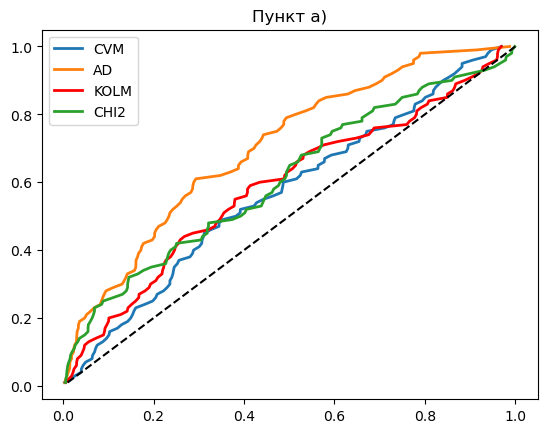

In [81]:
task(1)

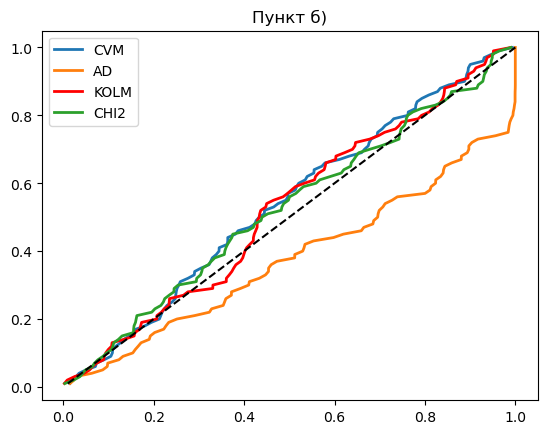

In [16]:
task(2)

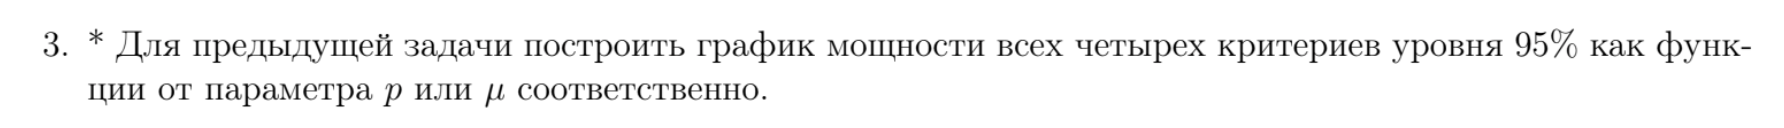

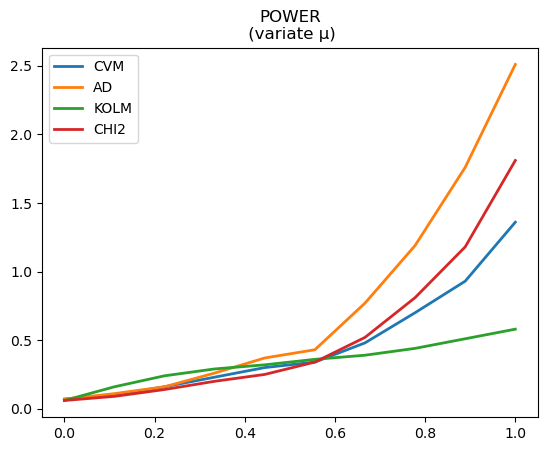

In [87]:
hypothesis = sts.norm
fig, ax = plt.subplots()
plt.title("POWER\n (variate µ)")
alpha = 0.05

size = 50
df = math.floor(math.log2(size))
division = [j/df for j in range(1,df)]
percentiles = [hypothesis.ppf(j) for j in division]
f_exp = [size * 1/df for j in range(df)]
result_cvm = []
power_cvm = []
result_ad = []
power_ad = []
result_kolm = []
power_kolm = []
result_chi2 = []
power_chi2 = []
mu_range = np.linspace(0,1,10)
for mu in mu_range:
    for j in range (division_rate):
        test = generate_sample_2(mu, size)

        test_stat_cvm = cvm_stat(test, hypothesis.cdf)
        test_res_cvm = monte_carlo_test(data_cvm, test_stat_cvm)
        result_cvm.append(test_res_cvm)

        test_stat_ad = ad_stat(test, hypothesis.cdf)
        test_res_ad = monte_carlo_test(data_ad, test_stat_ad)
        result_ad.append(test_res_ad)

        result_kolm.append(lilliefors(test, dist='norm')[1])

        f_obs = get_f_obs(test, percentiles)
        result_chi2.append(sts.chisquare(f_exp=f_exp, f_obs = f_obs)[1])
    
    check_cvm = np.array(result_cvm) < alpha
    power_cvm.append(sum(check_cvm)/division_rate)
    
    check_ad = np.array(result_ad) < alpha
    power_ad.append(sum(check_ad)/division_rate)
    
    check_kolm = np.array(result_kolm) < alpha
    power_kolm.append(sum(check_kolm)/division_rate)
    
    check_chi2 = np.array(result_chi2) < alpha
    power_chi2.append(sum(check_chi2)/division_rate)

ax.plot(mu_range,power_cvm, lw = 2, label = "CVM", alpha = 1)
ax.plot(mu_range,power_ad, lw = 2, label = "AD", alpha = 1)
ax.plot(mu_range,power_kolm, lw = 2, label = "KOLM", alpha = 1)
ax.plot(mu_range,power_chi2, lw = 2, label = "CHI2", alpha = 1)

ax.legend()

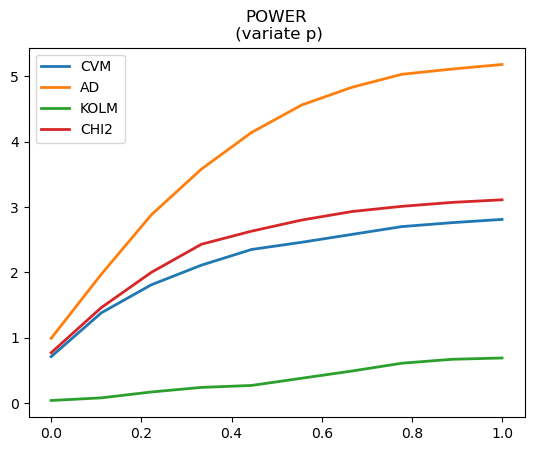

In [86]:
hypothesis = sts.norm
fig, ax = plt.subplots()
plt.title("POWER\n (variate p)")
alpha = 0.05

size = 50
df = math.floor(math.log2(size))
division = [j/df for j in range(1,df)]
percentiles = [hypothesis.ppf(j) for j in division]
f_exp = [size * 1/df for j in range(df)]
result_cvm = []
power_cvm = []
result_ad = []
power_ad = []
result_kolm = []
power_kolm = []
result_chi2 = []
power_chi2 = []
p_range = np.linspace(0,1,10)
for p in p_range:
    for j in range (division_rate):
        test = generate_sample_1(p, size)

        test_stat_cvm = cvm_stat(test, hypothesis.cdf)
        test_res_cvm = monte_carlo_test(data_cvm, test_stat_cvm)
        result_cvm.append(test_res_cvm)

        test_stat_ad = ad_stat(test, hypothesis.cdf)
        test_res_ad = monte_carlo_test(data_ad, test_stat_ad)
        result_ad.append(test_res_ad)

        result_kolm.append(lilliefors(test, dist='norm')[1])
        f_obs = get_f_obs(test, percentiles)
        result_chi2.append(sts.chisquare(f_exp=f_exp, f_obs = f_obs)[1])
    
    check_cvm = np.array(result_cvm) < alpha
    power_cvm.append(sum(check_cvm)/division_rate)
    
    check_ad = np.array(result_ad) < alpha
    power_ad.append(sum(check_ad)/division_rate)
    
    check_kolm = np.array(result_kolm) < alpha
    power_kolm.append(sum(check_kolm)/division_rate)
    
    check_chi2 = np.array(result_chi2) < alpha
    power_chi2.append(sum(check_chi2)/division_rate)

ax.plot(mu_range,power_cvm, lw = 2, label = "CVM", alpha = 1)
ax.plot(mu_range,power_ad, lw = 2, label = "AD", alpha = 1)
ax.plot(mu_range,power_kolm, lw = 2, label = "KOLM", alpha = 1)
ax.plot(mu_range,power_chi2, lw = 2, label = "CHI2", alpha = 1)

ax.legend()